In [1]:
# CSI5155 - ASSIGNEMENT 2 
# FALL 2022
# ADRIEN HEYMANS
# Pr. Herna L. Viktor, Phd

In [6]:
# Importing the data
# Following assignement 1, the cross validation had already been used, and the best accuracy was obtained with the drug : Canabis. Therefore for this assignement, we will be focusing only on Canabis.

from pyexpat import features
import numpy as np
import pandas as pd

data = "data/allData_normalized.csv"

# Retrieving the data from the csv file
df = pd.read_csv(data)
df.columns = ["id","age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss","alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]
features = df[["age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss"]]
drug = df[["canabis"]]
print(str(len(features)))
print(str(len(drug)))


1884
1884


Created 646 synthetic elements.


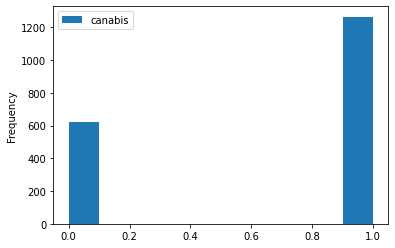

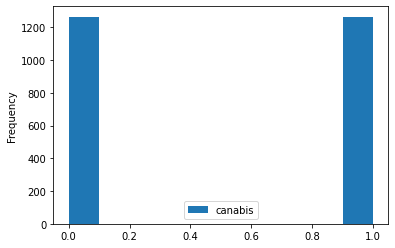

In [41]:
# Question 1
# We are first being asked to re-sample the dataset to balance it. Then we should save this as DB1.csv
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset before resampling 
drug.plot(kind="hist")

# Using SMOTE to re-sample the dataset
oversample = SMOTE()

X, y = oversample.fit_resample(features,drug)
print("Created "+str(len(X)-len(features))+" synthetic elements.")
#n, bins, patches = plt.hist(x=y, bins=1, color='#0504aa', alpha=0.7, rwidth=0.85)
y.plot(kind="hist")

# Saving the new dataset as DB1 in a .csv file
X['canabis']= y
X.to_csv("data/DB1.csv")

In [45]:
# Question 2 
# Training the 4 Previous algorithms on this new dataset 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score,accuracy_score,recall_score, precision_score
from sklearn import metrics
from sklearn.model_selection import KFold 

# Importing the data (From the newly created dataset)
data = "data/DB1.csv"
cl = "canabis"

# Retrieving the data from the csv file
db1 = pd.read_csv(data)
db1.columns= ["id","age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss","canabis"]
X = db1[["age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss"]]
y = db1[["canabis"]]
#print(db1)

# Name of the folder to store the results
folder_name = ["tree_classifier","svm_classifier","random_forest_classifier","knn_classifier"]

# Table that keeps track of all the results for all models 
summary_results = pd.DataFrame(columns=["Algorithm","Recall","Precision","Balanced Accuracy"])

# Looping through the 4 models 
for folder in folder_name:

    print('\033[1m'+folder.upper()+'\033[0m')

    # Creating an array to store the results
    results = pd.DataFrame(columns=["Fold","Recall","Precision","Balanced Accuracy"])

    # Values to keep track of accuracy 
    overall_accuracy = 0
    overall_recall =0
    overall_precision=0

    row = []

    kfold = KFold(n_splits=10, shuffle= True, random_state=1)

    index =1
    for train, test in kfold.split(db1):

        # Getting the training and testing set 
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        # #Using the classifier
        if (folder=="tree_classifier"):
            clf1 = tree.DecisionTreeClassifier() 
        elif (folder=="knn_classifier"):
            clf1 = KNeighborsClassifier()
        elif (folder=="svm_classifier"):
            clf1= svm.SVC(probability=True)
            
        else:
            clf1 = RandomForestClassifier()

        # Training and predictings
        clf1.fit(X_train,y_train.values.ravel())
        y_pred = clf1.predict(X_test)

        # Computing scores
        overall_accuracy = overall_accuracy + balanced_accuracy_score(y_test, y_pred)
        overall_recall = overall_recall + recall_score(y_test, y_pred)
        overall_precision = overall_precision + precision_score(y_test, y_pred)

        # Adding the accuracy results to the result array
        new_row = {"Fold":index,"Precision":precision_score(y_test, y_pred, average='weighted'),"Recall":recall_score(y_test, y_pred, average='weighted'),"Balanced Accuracy":balanced_accuracy_score(y_test, y_pred)}
        results = results.append(new_row,ignore_index=True)

        #Printing esults
        print("FOLD "+str(index)+" :  Accuracy = "+str(balanced_accuracy_score(y_test, y_pred))+" | Precision = "+str(precision_score(y_test, y_pred))+" | Recall = "+str(recall_score(y_test, y_pred)))
        index = index +1

    # Saving the results to a .csv file
    new_row = {"Fold":"All folds","Recall":overall_recall/10,"Precision":overall_precision/10,"Balanced Accuracy":overall_accuracy/10}
    results = results.append(new_row,ignore_index=True) 
    new_row = {"Algorithm":folder.upper(),"Recall":overall_recall/10,"Precision":overall_precision/10,"Balanced Accuracy":overall_accuracy/10}
    summary_results = summary_results.append(new_row,ignore_index=True) 
    results.to_csv("results/"+folder+"/"+folder+"_results_over_sampling.csv")
    print("Overal Accuracy = "+str(overall_accuracy/10)+" | Overall Precision = "+str(overall_precision/10)+" | Overall Recall = "+str(overall_recall/10))

# Saving the summary results table 
summary_results.to_csv("results/summary_results_over_sampling.csv")


TREE_CLASSIFIER
FOLD 1 :  Accuracy = 0.806015037593985 | Precision = 0.7933884297520661 | Recall = 0.8
FOLD 2 :  Accuracy = 0.79834375 | Precision = 0.7983870967741935 | Recall = 0.792
FOLD 3 :  Accuracy = 0.8024446958270488 | Precision = 0.8257575757575758 | Recall = 0.8014705882352942
FOLD 4 :  Accuracy = 0.84933049680891 | Precision = 0.85 | Recall = 0.8360655737704918
FOLD 5 :  Accuracy = 0.785593220338983 | Precision = 0.7711864406779662 | Recall = 0.7711864406779662
FOLD 6 :  Accuracy = 0.7984133952088298 | Precision = 0.816793893129771 | Recall = 0.7985074626865671
FOLD 7 :  Accuracy = 0.7734962406015038 | Precision = 0.7692307692307693 | Recall = 0.75
FOLD 8 :  Accuracy = 0.7682614133833646 | Precision = 0.808695652173913 | Recall = 0.7153846153846154
FOLD 9 :  Accuracy = 0.7366725065698911 | Precision = 0.7037037037037037 | Recall = 0.7786885245901639
FOLD 10 :  Accuracy = 0.7971014492753623 | Precision = 0.8175182481751825 | Recall = 0.8115942028985508
Overal Accuracy = 0.791

Created -646 synthetic elements.


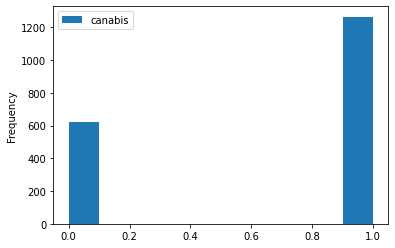

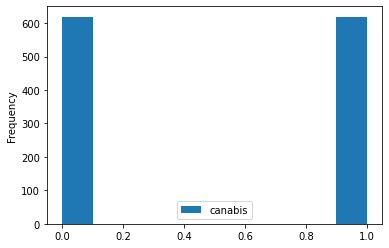

In [46]:
# Question 3 
# Using under-sampling 
# We are first being asked to undersample the dataset to balance it. Then we should save this as DB2.csv
from imblearn.under_sampling import NearMiss
import seaborn as sns

# Dataset before resampling 
drug.plot(kind="hist")

# The under-sampler
undersample = NearMiss(version=1)

X, y = undersample.fit_resample(features,drug)
print("Created "+str(len(X)-len(features))+" synthetic elements.")
y.plot(kind="hist")

# Saving the new dataset as DB1 in a .csv file
X['canabis']= y
X.to_csv("data/DB2.csv")


In [49]:
# Question 4 
# Training the 4 Previous examples on this new dataset 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score,accuracy_score,recall_score, precision_score
from sklearn import metrics
from sklearn.model_selection import KFold 

# Importing the data (From the newly created dataset)
data = "data/DB2.csv"
cl = "canabis"

# Retrieving the data from the csv file
db1 = pd.read_csv(data)
db1.columns= ["id","age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss","canabis"]
X = db1[["age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss"]]
y = db1[["canabis"]]

# Name of the folder to store the results
folder_name = ["tree_classifier","svm_classifier","random_forest_classifier","knn_classifier"]

# Table that keeps track of all the results for all models 
summary_results = pd.DataFrame(columns=["Algorithm","Recall","Precision","Balanced Accuracy"])

# Looping through the 4 models 
for folder in folder_name:

    print('\033[1m'+folder.upper()+'\033[0m')

    # Creating an array to store the results
    results = pd.DataFrame(columns=["Fold","Recall","Precision","Balanced Accuracy"])

    # Values to keep track of accuracy 
    overall_accuracy = 0
    overall_recall =0
    overall_precision=0

    row = []

    kfold = KFold(n_splits=10, shuffle= True, random_state=1)

    index =1
    for train, test in kfold.split(db1):

        # Getting the training and testing set 
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        # #Using the classifier
        if (folder=="tree_classifier"):
            clf1 = tree.DecisionTreeClassifier() 
        elif (folder=="knn_classifier"):
            clf1 = KNeighborsClassifier()
        elif (folder=="svm_classifier"):
            clf1= svm.SVC(probability=True)
        else:
            clf1 = RandomForestClassifier()

        # Training and prediction
        clf1.fit(X_train,y_train.values.ravel())
        y_pred = clf1.predict(X_test)

        # Computing scores
        overall_accuracy = overall_accuracy + balanced_accuracy_score(y_test, y_pred)
        overall_recall = overall_recall + recall_score(y_test, y_pred)
        overall_precision = overall_precision + precision_score(y_test, y_pred)

        # Adding the accuracy results to the result array
        new_row = {"Fold":index,"Precision":precision_score(y_test, y_pred, average='weighted'),"Recall":recall_score(y_test, y_pred, average='weighted'),"Balanced Accuracy":balanced_accuracy_score(y_test, y_pred)}
        results = results.append(new_row,ignore_index=True)

        #Printing esults
        print("FOLD "+str(index)+" :  Accuracy = "+str(balanced_accuracy_score(y_test, y_pred))+" | Precision = "+str(precision_score(y_test, y_pred))+" | Recall = "+str(recall_score(y_test, y_pred)))
        index = index +1

    # Saving the results to a .csv file
    new_row = {"Fold":"All folds","Recall":overall_recall/10,"Precision":overall_precision/10,"Balanced Accuracy":overall_accuracy/10}
    results = results.append(new_row,ignore_index=True) 
    new_row = {"Algorithm":folder.upper(),"Recall":overall_recall/10,"Precision":overall_precision/10,"Balanced Accuracy":overall_accuracy/10}
    summary_results = summary_results.append(new_row,ignore_index=True) 
    results.to_csv("results/"+folder+"/"+folder+"_results_under_sampling.csv")
    print("Overal Accuracy = "+str(overall_accuracy/10)+" | Overall Precision = "+str(overall_precision/10)+" | Overall Recall = "+str(overall_recall/10))

# Saving the summary results table 
summary_results.to_csv("results/summary_results_under_sampling.csv")

TREE_CLASSIFIER
FOLD 1 :  Accuracy = 0.6520208604954367 | Precision = 0.6379310344827587 | Recall = 0.6271186440677966
FOLD 2 :  Accuracy = 0.6533119658119658 | Precision = 0.576271186440678 | Recall = 0.6538461538461539
FOLD 3 :  Accuracy = 0.6933862433862434 | Precision = 0.726027397260274 | Recall = 0.7571428571428571
FOLD 4 :  Accuracy = 0.6296875 | Precision = 0.65 | Recall = 0.609375
FOLD 5 :  Accuracy = 0.6406127258444618 | Precision = 0.6896551724137931 | Recall = 0.5970149253731343
FOLD 6 :  Accuracy = 0.6529196124639958 | Precision = 0.6166666666666667 | Recall = 0.6491228070175439
FOLD 7 :  Accuracy = 0.7027062190996617 | Precision = 0.7407407407407407 | Recall = 0.6349206349206349
FOLD 8 :  Accuracy = 0.5966101694915253 | Precision = 0.5737704918032787 | Recall = 0.5932203389830508
FOLD 9 :  Accuracy = 0.591498940677966 | Precision = 0.6029411764705882 | Recall = 0.640625
FOLD 10 :  Accuracy = 0.6026218220338984 | Precision = 0.6271186440677966 | Recall = 0.578125
Overal Ac

In [51]:
# Question 5 
# We are now being asked to construct MLP and Gradient Boosting models against dataset D, DB1, DB2
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

models = ["gradient_boosting","multi_layer_perceptron"]

# Loading the different datasets 
data = ["data/allData_normalized.csv","data/DB1.csv","data/DB2.csv"]
cl = "canabis"

# Creating a table to keep track of the results 
summary_results = pd.DataFrame(columns=["Algorithm","Dataset","Mean cross-validated score","Parameters"])

for model in models:
    for d in data:
        dataset = pd.read_csv(d)

        if (data=="data/allData_normalized.csv"):
            dataset.columns =  ["age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss","alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]
            X = dataset.drop(["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa","id"],axis=1)
            y = dataset[["canabis"]]
        elif (data=="data/DB1.csv"):
            X = dataset.drop(["canabis"],axis=1)
            y = dataset[["canabis"]]
        else:
            X = dataset.drop(["canabis"],axis=1)
            y = dataset[["canabis"]]
        
        # Now that we have the dataset, we can prepare the models 
        if (model=="gradient_boosting"):
            clf = GradientBoostingClassifier()
        elif (model == "multi_layer_perceptron"):
            clf = MLPClassifier()

        # We can prepare the search space for hyoper-tuning
        if (model=="gradient_boosting"):
            parameters = {
                "n_estimators":[5,50,250,500],
                "max_depth":[1,3,5,7,9],
                "learning_rate":[0.01,0.1,1,10,100]
            }
        else:
            parameters = {
               'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                'activation': ['tanh', 'relu'],
                'solver': ['sgd', 'adam'],
                'alpha': [0.0001, 0.05],
                'learning_rate': ['constant','adaptive'],
            }


        # Using GridSearchCV we can now do the hypertuning 
        cv = GridSearchCV(estimator=clf,param_grid=parameters,cv=10)
        cv.fit(X,y.values.ravel())

        # Displaying the results for the model 
        print("For "+model.upper(), " and dataset "+d+" : ")
        print("\n The best estimator across ALL searched params: ",cv.best_estimator_)
        print("\n The best score across ALL searched params: ",cv.best_score_)
        print("\n The best parameters across ALL searched params: ",cv.best_params_)

        # Saving the results in a table 
        new_row = {"Algorithm":model,"Dataset":d,"Mean cross-validated score":cv.best_score_,"Parameters":cv.best_params_}
        summary_results = summary_results.append(new_row,ignore_index=True)

# Saving the results in .csv file
summary_results.to_csv("results/summary_results_ex5.csv")


        


For GRADIENT_BOOSTING  and dataset data/allData_normalized.csv : 
{'mean_fit_time': array([0.01513708, 0.0598444 , 0.27064619, 0.54728215, 0.01859345,
       0.14331944, 0.66202643, 1.28422508, 0.02427874, 0.22023067,
       1.13240867, 2.2419235 , 0.03513515, 0.34135818, 1.76216249,
       3.53018193, 0.04273531, 0.44482985, 2.58880184, 5.41489441,
       0.00730238, 0.0544976 , 0.26213126, 0.51979187, 0.01482744,
       0.12970009, 0.63140564, 1.25817864, 0.02370291, 0.21995304,
       1.0928932 , 2.17465065, 0.03456588, 0.35244126, 1.76596377,
       3.69857984, 0.0472374 , 0.5556246 , 2.88290906, 4.32527332,
       0.00735736, 0.05350146, 0.26031163, 0.51166487, 0.01460726,
       0.12690716, 0.62760477, 1.25129023, 0.02372062, 0.21764612,
       0.83542573, 0.91049483, 0.03535697, 0.3463845 , 0.61535151,
       0.68211484, 0.05072258, 0.50411682, 0.54558513, 0.61792288,
       0.0071866 , 0.05264709, 0.2586185 , 0.51394162, 0.01449904,
       0.12817266, 0.62652822, 1.26875472, 0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For MULTI_LAYER_PERCEPTRON  and dataset data/allData_normalized.csv : 
{'mean_fit_time': array([0.18476577, 0.71795044, 0.96643882, 0.71163261, 0.26835806,
       0.91555839, 1.05078416, 0.92932725, 0.13302219, 0.61805995,
       0.63759685, 0.63608954, 0.24754763, 0.8344171 , 1.01073272,
       0.78395102, 0.30651295, 0.84907005, 1.05987463, 0.92579076,
       0.10641732, 0.56425381, 0.6391058 , 0.59837401, 0.23836212,
       0.70197513, 0.77636328, 0.70084848, 0.37800643, 0.66515303,
       1.11429937, 0.77724559, 0.40817094, 0.5491888 , 0.70768912,
       0.5086169 , 0.28708203, 0.69198933, 1.40545421, 0.94764643,
       0.88570826, 1.04632046, 1.30904953, 0.70978258, 0.48253598,
       0.55338063, 0.87328141, 0.59010854]), 'std_fit_time': array([0.0753451 , 0.22250602, 0.38010059, 0.26274688, 0.12455456,
       0.17841166, 0.11012102, 0.23969486, 0.03584393, 0.1057866 ,
       0.18862751, 0.1045013 , 0.15078768, 0.12231956, 0.40577969,
       0.12484901, 0.11095659, 0.34432574, 0.1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

For MULTI_LAYER_PERCEPTRON  and dataset data/DB1.csv : 
{'mean_fit_time': array([0.53781416, 1.06508329, 1.34488854, 1.14029081, 0.63206108,
       1.47820346, 1.70518358, 1.48749869, 0.33483698, 1.33598495,
       0.68189411, 0.9847578 , 0.32700615, 0.98154755, 1.12443697,
       0.97793765, 0.53447673, 2.10168645, 1.55058885, 1.05610943,
       0.21618788, 0.74325523, 0.63514652, 1.16172147, 0.69236872,
       0.79467309, 1.77734263, 1.02358959, 0.25074725, 0.57185159,
       1.77242081, 0.68376753, 0.18276837, 0.72311761, 0.48131664,
       0.76445227, 0.43094745, 0.90120139, 1.02021577, 0.79500232,
       0.73573048, 0.39581802, 1.4405463 , 0.68212636, 0.0884002 ,
       0.67930806, 0.49457703, 0.77705975]), 'std_fit_time': array([0.24657876, 0.3941731 , 0.12798053, 0.62113107, 0.25811205,
       0.50661979, 0.31866001, 0.5211987 , 0.12293873, 0.43206288,
       0.20522769, 0.48233871, 0.13573593, 0.27497917, 0.20873699,
       0.48866394, 0.19854956, 0.81227723, 0.25159158, 0.2766

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

For MULTI_LAYER_PERCEPTRON  and dataset data/DB2.csv : 
{'mean_fit_time': array([0.28184993, 0.76680412, 0.64587395, 0.55382788, 0.1932714 ,
       0.62204518, 1.1455744 , 0.69173057, 0.12106504, 0.59836702,
       0.44131629, 0.55714397, 0.25233927, 0.45912013, 0.97230239,
       0.49075351, 0.26853373, 0.69571447, 0.89983273, 0.64646273,
       0.12080591, 0.61484375, 0.60699735, 0.56567302, 1.37248442,
       0.9096781 , 1.69638822, 0.76394048, 1.43614373, 0.6703995 ,
       1.55546908, 0.41347024, 0.12254863, 0.50810697, 0.25023186,
       0.70056791, 1.09097502, 0.67956855, 1.563117  , 0.92438357,
       1.73959517, 0.96195128, 1.83661425, 0.64020772, 0.05173874,
       0.47095499, 0.24499855, 0.54101143]), 'std_fit_time': array([0.13679729, 0.18743739, 0.10639572, 0.10938041, 0.06499706,
       0.11079334, 0.46309408, 0.23975363, 0.04303657, 0.10810109,
       0.2341206 , 0.16347209, 0.10260654, 0.09915108, 0.38651448,
       0.15198918, 0.12920665, 0.16320619, 0.19796025, 0.1617

In [72]:

# Question 6 : Cleaning the 2 new datasets 

# We are now being asked to construct MLP and Gradient Boosting models against dataset D, DB1, DB2
from curses import raw
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from numpy import nan
from sklearn.impute import KNNImputer

# List of the models to use
models = ["tree_classifier","svm_classifier","random_forest_classifier","knn_classifier","gradient_boosting","multi_layer_perceptron"]

# Loading the different datasets 
data = ["data/heart-disease/heart_normalized.csv","data/labor-negotiation/labor_negotiation_cleaned.csv"]
# First we have some cleaning to do for the datasets : heart.csv, labor-relations.csv
# We are starting by cleaning and normalizing the heart disease datasets
raw_data = pd.read_csv("data/heart-disease/heart.csv")
normalized_data = (raw_data-raw_data.min())/(raw_data.max()-raw_data.min())
normalized_data.to_csv("data/heart-disease/heart_normalized.csv")

# Now we must clean the labor relations dataset 
raw_train_data = pd.read_csv("data/labor-negotiation/C4.5_labor-neg.data.csv")
raw_train_data.columns = ["duration","wage1","wage2","wage3","cost_of_living_allowance","working_hours","pension","standby_pay","shift_differential","education_allowance","holidays","vacation","longterm_disabilities","dental_insurance","bereavement","employer_health_plan","classes"]
raw_test_data = pd.read_csv("data/labor-negotiation/C4.5_labor-neg.test.csv")
raw_test_data.columns= ["duration","wage1","wage2","wage3","cost_of_living_allowance","working_hours","pension","standby_pay","shift_differential","education_allowance","holidays","vacation","longterm_disabilities","dental_insurance","bereavement","employer_health_plan","classes"]

# Merging the 2 datasets together 
raw_data = raw_test_data.append(raw_train_data,ignore_index=True)

# We must clean and normalize this dataset, we notice that there is a lot of missing values, this might lead to low accuracy
raw_data = raw_data.replace("?",nan)
raw_data = raw_data.replace(["yes","good"],1)
raw_data = raw_data.replace(["no","bad"],0)

# We have some ordinal data that we can replace with a scale
raw_data = raw_data.replace("none",0)
raw_data = raw_data.replace("half",0.5)
raw_data = raw_data.replace("full",1)
raw_data = raw_data.replace("generous",1)
raw_data = raw_data.replace("average",0.5)
raw_data = raw_data.replace("below average",0)
raw_data = raw_data.replace("tcf",0.5)
raw_data = raw_data.replace("tc",1)
raw_data = raw_data.replace("ret_allw",0.5)
raw_data = raw_data.replace("empl_contr",1)

#print(raw_data.isnull().sum())
print(raw_data.isnull().mean())

# Some of the columns have more than 50% of missing values, we are dropping thos columns
null_percentage = raw_data.isnull().sum()/raw_data.shape[0]*100
col_to_drop = null_percentage[null_percentage>50].keys()
raw_data = raw_data.drop(col_to_drop, axis=1)
columns = raw_data.columns
# We will now fill the missing values using a model
imputer = KNNImputer(n_neighbors=5, weights="uniform")
raw_data = pd.DataFrame(imputer.fit_transform(raw_data))
raw_data.columns = columns

# We will now normalize the dataset 
raw_data = (raw_data-raw_data.min())/(raw_data.max()-raw_data.min())

# Saving the datset as a .csv file 
raw_data.to_csv("data/labor-negotiation/labor_negotiation_cleaned.csv")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

For TREE_CLASSIFIER  and dataset data/heart-disease/heart_normalized.csv : 
The best estimator across ALL searched params:  DecisionTreeClassifier(max_depth=5, splitter='random')
The best score across ALL searched params:  0.9672043010752688
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

For TREE_CLASSIFIER  and dataset data/labor-negotiation/labor_negotiation_cleaned.csv : 
The best estimator across ALL searched params:  DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')
The best score across ALL searched params:  0.8699999999999999
The best parameters across ALL searched params:  {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
For SVM_CLASSIFIER  and dataset data/heart-disease/heart_normalized.csv : 
The best estimator across ALL searched params:  SVC(degree=1)
The best score across ALL searched params:  0.9507526881720428
The best parameters across ALL searched params:  {'degree': 1}
For SVM_CLASSIFIER  and dataset data/labor-negotiation/labor_negotiation_cleaned.csv : 
The best estimator across ALL searched params:  SVC(degree=1)
The best score across ALL searched params:  0.7133333333333333
The best parameters across ALL searched params:  {'degree': 1}


KeyboardInterrupt: 

In [73]:
# Question 6 and 7 :
# Training the 6 algortihms against the 5 datasets 

from curses import raw
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from numpy import nan
from sklearn.impute import KNNImputer
from scipy.stats import friedmanchisquare
# List of the models to use
models = ["gradient_boosting","tree_classifier","svm_classifier","random_forest_classifier","knn_classifier","multi_layer_perceptron"]

# Loading the different datasets 
data = ["data/labor-negotiation/labor_negotiation_cleaned.csv","data/heart-disease/heart_normalized.csv","data/allData_normalized.csv","data/DB1.csv","data/DB2.csv"]

# Creating a table to keep track of the results 
summary_results = pd.DataFrame(columns=["Dataset","Tree","SVM","KNN","GB","RF","MLP"])

for d in data:
    knnAcc,gbAcc,rfAcc,treeAcc,svmAcc,mlpAcc =0,0,0,0,0,0
    for model in models:
        dataset = pd.read_csv(d)

        if (d=="data/labor-negotiation/labor_negotiation_cleaned.csv"):
            X = dataset.drop(["classes"],axis=1)
            y = dataset["classes"]
        elif (d=="data/heart-disease/heart_normalized.csv") :
            X = dataset.drop(["output"],axis=1)
            y = dataset["output"]
        elif (d=="data/allData_normalized.csv"):
            X = dataset.drop(["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"],axis=1)
            y = dataset[["canabis"]]
        elif (d=="data/DB1.csv"):
            X = dataset.drop(["canabis"],axis=1)
            y = dataset[["canabis"]]
        elif (d=="data/DB2.csv"): 
            X = dataset.drop(["canabis"],axis=1)
            y = dataset[["canabis"]]
    
        # Now that we have the dataset, we can prepare the models 
        if (model=="gradient_boosting"):
            clf = GradientBoostingClassifier()
        elif (model =="tree_classifier"):
            clf = tree.DecisionTreeClassifier()
        elif (model=="svm_classifier"):
            clf = svm.SVC()
        elif (model=="random_forest_classifier"):
            clf = RandomForestClassifier()
        elif (model=="knn_classifier"):
            clf = KNeighborsClassifier()
        elif (model=="multi_layer_perceptron"):
            clf = MLPClassifier()

        # We can prepare the search space for hyoper-tuning

        if (model=="gradient_boosting"):
            parameters = {
                "n_estimators":[5,50,250,500],
                "max_depth":[1,3,5,7,9],
                "learning_rate":[0.01,0.1,1,10,100]
            }
        elif (model =="tree_classifier"):
            parameters = {
                "criterion":["gini","entropy","log_loss"],
                "splitter":["best","random"],
                "max_depth":[2,3,4,5]
            }
        elif (model=="svm_classifier"):
            parameters = {
                "degree":[1,2,3,4,5,6,7]
            }
        elif (model=="random_forest_classifier"):
            parameters = {
                "n_estimators":[50,100,200,300],
                "criterion":["gini","entropy","log_loss"],
                "max_depth":[2,3,4,5]
            }
        elif (model=="knn_classifier"):
            parameters = {
                "n_neighbors":[2,3,4,5,10,15,20],
                "p":[0,1,2]
            }
        elif (model=="multi_layer_perceptron"):
            parameters = {
               'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                'activation': ['tanh', 'relu'],
                'solver': ['sgd', 'adam'],
                'alpha': [0.0001, 0.05],
                'learning_rate': ['constant','adaptive'],
            }

        # Using GridSearchCV we can now do the hypertuning 
        cv = GridSearchCV(estimator=clf,param_grid=parameters,cv=10)
        cv.fit(X,y.values.ravel())

        # Displaying the results for the model 
        print("For "+model.upper(), " and dataset "+d+" : ")
        print("The best estimator across ALL searched params: ",cv.best_estimator_)
        print("The best score across ALL searched params: ",cv.best_score_)
        print("The best parameters across ALL searched params: ",cv.best_params_)

        # Now that we have the dataset, we can prepare the models 
        if (model=="gradient_boosting"):
            gbAcc = cv.best_score_
        elif (model =="tree_classifier"):
            treeAcc = cv.best_score_
        elif (model=="svm_classifier"):
            svmAcc = cv.best_score_
        elif (model=="random_forest_classifier"):
            rfAcc = cv.best_score_
        elif (model=="knn_classifier"):
            knnAcc = cv.best_score_
        elif (model=="multi_layer_perceptron"):
           mlpAcc = cv.best_score_

    new_row = {"Dataset":d,"Tree":treeAcc,"SVM":svmAcc,"KNN":knnAcc,"GB":gbAcc,"RF":rfAcc,"MLP":mlpAcc}
    summary_results = summary_results.append(new_row,ignore_index=True)

# Saving the results in .csv file
summary_results.to_csv("results/summary_results_ex7.csv")


# We are now asked to calculate the friedman statistic for those models 

# We are now asked to calculate the friedman statistic for those models 
f_test = friedmanchisquare(summary_results['Tree'],summary_results['SVM'],summary_results['KNN'],summary_results["GB"],summary_results["RF"],summary_results["MLP"])
summary_results = pd.read_csv("results/summary_results_ex7.csv")


For GRADIENT_BOOSTING  and dataset data/labor-negotiation/labor_negotiation_cleaned.csv : 
The best estimator across ALL searched params:  GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=5)
The best score across ALL searched params:  0.8300000000000001
The best parameters across ALL searched params:  {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 5}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

For TREE_CLASSIFIER  and dataset data/labor-negotiation/labor_negotiation_cleaned.csv : 
The best estimator across ALL searched params:  DecisionTreeClassifier(max_depth=3, splitter='random')
The best score across ALL searched params:  0.8699999999999999
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
For SVM_CLASSIFIER  and dataset data/labor-negotiation/labor_negotiation_cleaned.csv : 
The best estimator across ALL searched params:  SVC(degree=1)
The best score across ALL searched params:  0.7133333333333333
The best parameters across ALL searched params:  {'degree': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/si

For RANDOM_FOREST_CLASSIFIER  and dataset data/labor-negotiation/labor_negotiation_cleaned.csv : 
The best estimator across ALL searched params:  RandomForestClassifier(max_depth=5, n_estimators=50)
The best score across ALL searched params:  0.9133333333333333
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/p

For KNN_CLASSIFIER  and dataset data/labor-negotiation/labor_negotiation_cleaned.csv : 
The best estimator across ALL searched params:  KNeighborsClassifier(p=1)
The best score across ALL searched params:  0.75
The best parameters across ALL searched params:  {'n_neighbors': 5, 'p': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

For MULTI_LAYER_PERCEPTRON  and dataset data/labor-negotiation/labor_negotiation_cleaned.csv : 
The best estimator across ALL searched params:  MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive')
The best score across ALL searched params:  0.9266666666666667
The best parameters across ALL searched params:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
For GRADIENT_BOOSTING  and dataset data/heart-disease/heart_normalized.csv : 
The best estimator across ALL searched params:  GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=50)
The best score across ALL searched params:  0.9507526881720428
The best parameters across ALL searched params:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

For TREE_CLASSIFIER  and dataset data/heart-disease/heart_normalized.csv : 
The best estimator across ALL searched params:  DecisionTreeClassifier(max_depth=2)
The best score across ALL searched params:  0.9507526881720428
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
For SVM_CLASSIFIER  and dataset data/heart-disease/heart_normalized.csv : 
The best estimator across ALL searched params:  SVC(degree=1)
The best score across ALL searched params:  0.9507526881720428
The best parameters across ALL searched params:  {'degree': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/si

For RANDOM_FOREST_CLASSIFIER  and dataset data/heart-disease/heart_normalized.csv : 
The best estimator across ALL searched params:  RandomForestClassifier(criterion='entropy', max_depth=2)
The best score across ALL searched params:  0.9706451612903226
The best parameters across ALL searched params:  {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 100}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/p

For KNN_CLASSIFIER  and dataset data/heart-disease/heart_normalized.csv : 
The best estimator across ALL searched params:  KNeighborsClassifier(n_neighbors=2, p=1)
The best score across ALL searched params:  0.9573118279569893
The best parameters across ALL searched params:  {'n_neighbors': 2, 'p': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

For MULTI_LAYER_PERCEPTRON  and dataset data/heart-disease/heart_normalized.csv : 
The best estimator across ALL searched params:  MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive')
The best score across ALL searched params:  0.9835483870967743
The best parameters across ALL searched params:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
For GRADIENT_BOOSTING  and dataset data/allData_normalized.csv : 
The best estimator across ALL searched params:  GradientBoostingClassifier(max_depth=1, n_estimators=50)
The best score across ALL searched params:  0.7501350894967916
The best parameters across ALL searched params:  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

For TREE_CLASSIFIER  and dataset data/allData_normalized.csv : 
The best estimator across ALL searched params:  DecisionTreeClassifier(max_depth=5, splitter='random')
The best score across ALL searched params:  0.7740346729708432
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
For SVM_CLASSIFIER  and dataset data/allData_normalized.csv : 
The best estimator across ALL searched params:  SVC(degree=1)
The best score across ALL searched params:  0.6926066644151752
The best parameters across ALL searched params:  {'degree': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/si

For RANDOM_FOREST_CLASSIFIER  and dataset data/allData_normalized.csv : 
The best estimator across ALL searched params:  RandomForestClassifier(max_depth=5)
The best score across ALL searched params:  0.750171676235506
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/p

For KNN_CLASSIFIER  and dataset data/allData_normalized.csv : 
The best estimator across ALL searched params:  KNeighborsClassifier(n_neighbors=20, p=1)
The best score across ALL searched params:  0.4314702240234155
The best parameters across ALL searched params:  {'n_neighbors': 20, 'p': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

For MULTI_LAYER_PERCEPTRON  and dataset data/allData_normalized.csv : 
The best estimator across ALL searched params:  MLPClassifier(learning_rate='adaptive')
The best score across ALL searched params:  0.7850529100529101
The best parameters across ALL searched params:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
For GRADIENT_BOOSTING  and dataset data/DB1.csv : 
The best estimator across ALL searched params:  GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=5)
The best score across ALL searched params:  0.766798418972332
The best parameters across ALL searched params:  {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 5}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

For TREE_CLASSIFIER  and dataset data/DB1.csv : 
The best estimator across ALL searched params:  DecisionTreeClassifier(max_depth=4, splitter='random')
The best score across ALL searched params:  0.808695652173913
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
For SVM_CLASSIFIER  and dataset data/DB1.csv : 
The best estimator across ALL searched params:  SVC(degree=1)
The best score across ALL searched params:  0.7166007905138341
The best parameters across ALL searched params:  {'degree': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/si

For RANDOM_FOREST_CLASSIFIER  and dataset data/DB1.csv : 
The best estimator across ALL searched params:  RandomForestClassifier(max_depth=2, n_estimators=50)
The best score across ALL searched params:  0.8221343873517787
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/p

For KNN_CLASSIFIER  and dataset data/DB1.csv : 
The best estimator across ALL searched params:  KNeighborsClassifier(n_neighbors=20, p=1)
The best score across ALL searched params:  0.5019762845849802
The best parameters across ALL searched params:  {'n_neighbors': 20, 'p': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

For MULTI_LAYER_PERCEPTRON  and dataset data/DB1.csv : 
The best estimator across ALL searched params:  MLPClassifier(learning_rate='adaptive')
The best score across ALL searched params:  0.8011857707509881
The best parameters across ALL searched params:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
For GRADIENT_BOOSTING  and dataset data/DB2.csv : 
The best estimator across ALL searched params:  GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=5)
The best score across ALL searched params:  0.9506097560975609
The best parameters across ALL searched params:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

For TREE_CLASSIFIER  and dataset data/DB2.csv : 
The best estimator across ALL searched params:  DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')
The best score across ALL searched params:  0.9595135064253869
The best parameters across ALL searched params:  {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
For SVM_CLASSIFIER  and dataset data/DB2.csv : 
The best estimator across ALL searched params:  SVC(degree=1)
The best score across ALL searched params:  0.9506097560975609
The best parameters across ALL searched params:  {'degree': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/si

For RANDOM_FOREST_CLASSIFIER  and dataset data/DB2.csv : 
The best estimator across ALL searched params:  RandomForestClassifier(max_depth=2, n_estimators=300)
The best score across ALL searched params:  0.9514227642276423
The best parameters across ALL searched params:  {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 300}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/p

For KNN_CLASSIFIER  and dataset data/DB2.csv : 
The best estimator across ALL searched params:  KNeighborsClassifier(p=1)
The best score across ALL searched params:  0.9514162077104642
The best parameters across ALL searched params:  {'n_neighbors': 5, 'p': 1}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

For MULTI_LAYER_PERCEPTRON  and dataset data/DB2.csv : 
The best estimator across ALL searched params:  MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 50, 50),
              learning_rate='adaptive')
The best score across ALL searched params:  0.9813794912142668
The best parameters across ALL searched params:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
